In [6]:
#!pip install --upgrade azure-cognitiveservices-vision-customvision
#!pip install matplotlib

In [7]:
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from msrest.authentication import ApiKeyCredentials
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import os

In [8]:
prediction_endpoint = 'https://custv52d-prediction.cognitiveservices.azure.com/'
prediction_key = 'add_your_prediction_key'
project_id = 'd0c9975a-4e9f-4845-b820-a4600f1886c3'
model_name = 'carDetector'

In [9]:
# Authenticate a client for the training API
credentials = ApiKeyCredentials(in_headers={"Prediction-key": prediction_key})
prediction_client = CustomVisionPredictionClient(endpoint=prediction_endpoint, credentials=credentials)

In [10]:
image_file = 'C:/Users/Money exchange/Desktop/MUSTAFA/Engineering AI Solutions/Task 5.2D/extracted_frames/frame_0052.jpg'
image = Image.open(image_file)
h, w, ch = np.array(image).shape

In [11]:
with open(image_file, mode="rb") as image_data:
    results = prediction_client.detect_image(project_id, model_name, image_data)

In [12]:
for obj in results.predictions:
  if (obj.probability*100) > 30:
    print("Detected object:", obj.tag_name)
    print("Bounding box:", obj.bounding_box)
    print("Confidence:", obj.probability)
    print()

Detected object: car
Bounding box: {'additional_properties': {}, 'left': 0.24460426, 'top': 0.36635116, 'width': 0.07416478, 'height': 0.11679581}
Confidence: 0.8845352

Detected object: car
Bounding box: {'additional_properties': {}, 'left': 0.2929193, 'top': 0.29236197, 'width': 0.037301272, 'height': 0.052496493}
Confidence: 0.8353629

Detected object: car
Bounding box: {'additional_properties': {}, 'left': 0.5429874, 'top': 0.22795041, 'width': 0.019881308, 'height': 0.02849026}
Confidence: 0.7920668

Detected object: car
Bounding box: {'additional_properties': {}, 'left': 0.19737628, 'top': 0.29901662, 'width': 0.054478824, 'height': 0.070860386}
Confidence: 0.79034585

Detected object: car
Bounding box: {'additional_properties': {}, 'left': 0.6103091, 'top': 0.20849334, 'width': 0.020948112, 'height': 0.029113784}
Confidence: 0.77060676



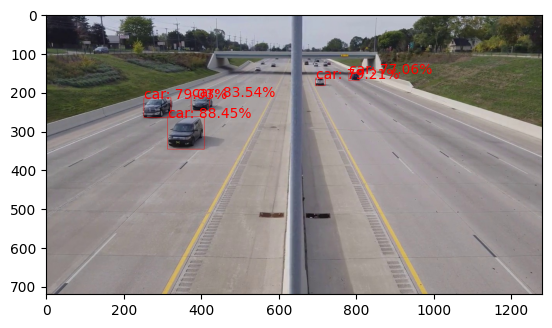

In [13]:
draw = ImageDraw.Draw(image)
lineWidth = int(w/1000)
color = 'red'
# Only show predictions with a > 50% probability
for prediction in results.predictions:
    if (prediction.probability * 100) > 50:
        # Box coordinates and dimensions are proportional - convert to absolute
        left = prediction.bounding_box.left * w
        top = prediction.bounding_box.top * h
        height = prediction.bounding_box.height * h
        width = prediction.bounding_box.width * w
        
        # Draw the box
        points = ((left, top), (left + width, top), (left + width, top + height), (left, top + height), (left, top))
        draw.line(points, fill=color, width=lineWidth)
        
        # Add the tag name and probability
        plt.annotate(prediction.tag_name + ': {0:.2f}%'.format(prediction.probability * 100), (left, top), color=color)
    
plt.imshow(image)

In [14]:
import cv2

In [15]:
# Function to detect objects in a frame
def detect_objects(frame):
    # Convert frame to bytes
    _, img_encoded = cv2.imencode('.jpg', frame)
    image_bytes = img_encoded.tobytes()

    # Call the Custom Vision API to detect objects
    results = prediction_client.detect_image(project_id, model_name, image_bytes)
    
    # Draw bounding boxes on the frame
    for prediction in results.predictions:
        if prediction.probability > 0.5:  # Only show predictions with a confidence above 50%
            left = int(prediction.bounding_box.left * frame.shape[1])
            top = int(prediction.bounding_box.top * frame.shape[0])
            right = int(left + prediction.bounding_box.width * frame.shape[1])
            bottom = int(top + prediction.bounding_box.height * frame.shape[0])
            cv2.rectangle(frame, (left, top), (right, bottom), (0, 255, 0), 2)
            cv2.putText(frame, prediction.tag_name, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    return frame

In [21]:
# Open video file
video_capture = cv2.VideoCapture('Highway Traffic.mp4')

In [22]:
frame_count = 0

# Loop through frames
while video_capture.isOpened():
    ret, frame = video_capture.read()
    if not ret:
        break

    frame_count += 1

    # Skip processing for two frames and then process the third frame
    if frame_count % 5 == 0:
        # Detect objects in the frame
        frame_with_objects = detect_objects(frame)

        # Display the frame
        cv2.imshow('Video', frame_with_objects)

        # Break the loop if 'q' key is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        # Display the frame without processing
        cv2.imshow('Video', frame)

# Release the video capture object
video_capture.release()
cv2.destroyAllWindows()

In [17]:
# Loop through frames
frame_count = 0

# Loop through frames

while video_capture.isOpened():
    ret, frame = video_capture.read()
    if not ret:
        break

    # Detect objects in the frame
    frame_with_objects = detect_objects(frame)

    # Display the frame
    cv2.imshow('Video', frame_with_objects)

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object
video_capture.release()
cv2.destroyAllWindows()